In [2]:
#Dataset Creation
import numpy as np

age = np.random.choice(['Young', 'Middle', 'Old'], size=100)
gen = np.random.choice(['Male', 'Female'], size = 100)
chol = np.random.choice(['High', 'Normal'], size = 100)
hd = np.random.choice(['Yes', 'No'], size = 100)

import pandas as pd
dataset = pd.DataFrame({'Age': age, 'Gender': gen, 'Cholesterol' : chol, 'HeartDisease' : hd})


In [3]:
dataset

,Age,Gender,Cholesterol,HeartDisease
0,Middle,Male,Normal,Yes
1,Young,Female,High,No
2,Middle,Male,Normal,No
3,Young,Female,Normal,Yes
4,Young,Male,Normal,Yes
...,...,...,...,...
95,Old,Male,High,Yes
96,Old,Female,High,No
97,Middle,Female,Normal,Yes
98,Young,Male,Normal,Yes


In [4]:
!pip install pgmpy

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [5]:
#Constructing Bayesian Network
import pandas as pd
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination

model = BayesianNetwork([
    ('Age', 'HeartDisease'),
    ('Gender', 'HeartDisease'),
    ('Cholesterol', 'HeartDisease')
])
model.fit(dataset, estimator=MaximumLikelihoodEstimator)
inference = VariableElimination(model)

q1 = inference.query(variables=['HeartDisease'],
                    evidence={'Age': 'Middle', 'Gender': 'Male', 'Cholesterol': 'High'})
q2 = inference.query(variables=['HeartDisease'],
                    evidence={'Age': 'Middle', 'Gender': 'Female', 'Cholesterol': 'Normal'})
print("Age: Middle, Gender: Male, Cholesterol: High")
print(q1)

print("\n\nAge: Middle, Gender: Female, Cholesterol: Normal")
print(q2)



Age: Middle, Gender: Male, Cholesterol: High
+-------------------+---------------------+
| HeartDisease      |   phi(HeartDisease) |
+===================+=====================+
| HeartDisease(No)  |              0.2857 |
+-------------------+---------------------+
| HeartDisease(Yes) |              0.7143 |
+-------------------+---------------------+


Age: Middle, Gender: Female, Cholesterol: Normal
+-------------------+---------------------+
| HeartDisease      |   phi(HeartDisease) |
+===================+=====================+
| HeartDisease(No)  |              0.4000 |
+-------------------+---------------------+
| HeartDisease(Yes) |              0.6000 |
+-------------------+---------------------+


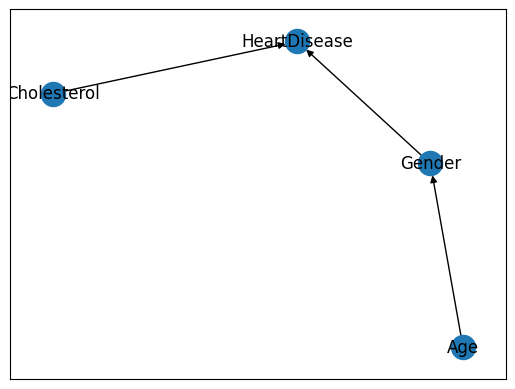

In [6]:
import networkx as nx

model = BayesianNetwork([
    ('Age', 'Gender'),
    ('Gender', 'HeartDisease'),
    ('Cholesterol', 'HeartDisease')
])

G = nx.DiGraph()
G.add_nodes_from(model.nodes())
G.add_edges_from(model.edges())

nx.draw_networkx(G, with_labels=True)